<a href="https://www.kaggle.com/code/adhenzmiranda/drugs-classification?scriptVersionId=213477445" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import the Modules

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


# Read the Data

In [2]:
data = pd.read_csv("/kaggle/input/drug-classification/drug-classification.csv")

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Gender       200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Data Pre-processing

In [3]:
# Pre-processing the gender by mapping

gender_map = {

    'M' : 0,

    'F' : 1

}

data['Gender'] = data['Gender'].map(gender_map)



# Pre-processing the BP by mapping

bp_map = {

    'LOW' : 0,

    'NORMAL' : 1,

    'HIGH' : 2

}

data['BP'] = data['BP'].map(bp_map)





# Pre-processing the Cholesterol by mapping

cholesterol_map = {

    'NORMAL' : 0,

    'HIGH' : 1

}

data['Cholesterol'] = data['Cholesterol'].map(cholesterol_map)



# Pre-processing the Drug by mapping

drug_map = {

    'drugA' : 0,

    'drugB' : 1,

    'drugC' : 2,

    'drugX' : 3,

    'DrugY' : 4,

}



data['Drug'] = data['Drug'].map(drug_map)



x = data[['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K']]

y = data['Drug']

# Split the data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

# Predicting the data with Decision Tree Classifier

In [5]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)



y_pred = model.predict(x_test)



y_pred

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0, 3, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4, 0, 4, 1, 4, 3, 4,
       4, 4, 4, 1, 3, 3, 3, 1, 0, 3, 4, 3, 0, 3, 2, 4, 0, 0, 0, 1, 1, 0,
       4, 0, 4, 4, 0, 4, 4, 4, 3, 4, 3, 4, 4, 3, 1, 3, 4, 0, 2, 4, 3, 3,
       4, 4, 3, 4, 1, 4, 1, 3, 4, 4])

# Accuracy of the Data - 99.17%

In [6]:
# Evaluate the Decision Tree model

accuracy = accuracy_score(y_test, y_pred)

print(f'Decision Tree Classifier Accuracy: {accuracy*100:.2f}'+'%')

Decision Tree Classifier Accuracy: 99.17%


# Visualize and Test


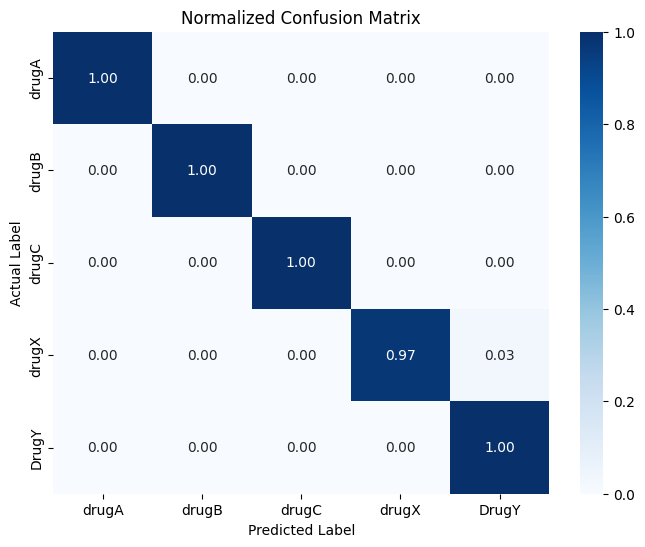

In [7]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.figure(figsize=(8, 6))

sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f', xticklabels=drug_map.keys(), yticklabels=drug_map.keys())

plt.title('Normalized Confusion Matrix')

plt.xlabel('Predicted Label')

plt.ylabel('Actual Label')

plt.show()

# Classification Report

In [8]:
print('Decision Tree Classification Report:')

print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        50

    accuracy                           0.99       120
   macro avg       1.00      0.99      1.00       120
weighted avg       0.99      0.99      0.99       120

